In [862]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [863]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    boxA = [a / 100. for a in boxA]
    boxB = [b / 100. for b in boxB]
    
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


# if __name__ == '__main__':
#     # Pointing out a wrong IoU implementation in https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
#     boxA = [0., 0., 10., 10.]
#     boxB = [1., 1., 11., 11.]

#     correct = bb_intersection_over_union(boxA, boxB)
#     print('Correct solution - also analytical: {0}\n'
#           'Solution by published function: {1}\n'
#           'Solution by correction (ptyshevs): {2}'.format(correct, '0.704225352113', '0.680672268908'))

#     print('Normalizing coordinates in a 100x100 coordinate system')
#     boxA = [a / 100. for a in boxA]
#     boxB = [b / 100. for b in boxB]

#     correct = bb_intersection_over_union(boxA, boxB)

#     print('Correct solution - also analytical: {0}\n'
#           'Solution by published function: {1}\n'
#           'Solution by correction: {2}'.format(correct, '0.964445166004', '0.680672268908'))

In [864]:
### although it shows red, the lines are in blue
### following bounds for blue color
### For GT and TMGEM ###
def blue_color_segment(img, kernel_1, kernel_2):
    lower = np.array([105,50,50],dtype = "uint8") #lower color Blue
    upper = np.array([130,255,255], dtype = "uint8") #upper color Blue
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    
    ### for GT:: kernel_1 = np.ones((5,5),np.uint8) and kernel_2 = np.ones((5,5),np.uint8) and iterations = 3##
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_1)
    dilation = cv2.dilate(opening,kernel_2,iterations = 2)
    plt.imshow(dilation,cmap = 'gray')
    
    return dilation

In [865]:
### although it shows Blue for algorithm output, the lines are in Red
### following bounds for RED color
### For Algorithms ###
def red_color_segment(img, kernel_1, kernel_2):
    lower = np.array([0,50,50],dtype = "uint8") #lower color Red
    upper = np.array([10,255,255], dtype = "uint8") #upper color Red
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    
    ### for Algo:: kernel_1 = np.ones((1,1),np.uint8) and kernel_2 = np.ones((5,5),np.uint8) and iterations = 3
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_1)
    dilation = cv2.dilate(opening,kernel_2,iterations = 3)
    plt.imshow(dilation,cmap = 'gray')
    
    return dilation

In [866]:
def tmgem_color_segment(img, kernel_1, kernel_2):
    lower = np.array([115,50,50],dtype = "uint8") #lower color Blue
    upper = np.array([130,255,255], dtype = "uint8") #upper color Blue
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    
    ### for GT:: kernel_1 = np.ones((5,5),np.uint8) and kernel_2 = np.ones((5,5),np.uint8) and iterations = 3##
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_1)
    dilation = cv2.dilate(opening,kernel_2,iterations = 2)
    plt.imshow(dilation,cmap = 'gray')
    
    return dilation

In [867]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [868]:
def bb_points(img, dilation):
    contours, hier = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bb_point = []
    for c in contours:
        # get the bounding rect
        x, y, w, h = cv2.boundingRect(c)
        print("x,y,w,h:",x,y,w,h)
        
        if(w*h < 1550):
            pass
        else:
        #print("rectangle area:", w*h)
        # draw a green rectangle to visualize the bounding rect
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 2)
            points = [x, y, x+w, y+h]
            bb_point.append(points)
    
    bb_point.sort(key=lambda x:x[0],reverse=False)
    plt.imshow(img)
    
    return bb_point

In [869]:
#img_gt = cv2.imread(r"C:\Users\khan1\jupyter_test_code\IoU_test\roi_gt\roi_gt_img005.png") 
img_gt = cv2.imread(r"C:\Users\khan1\jupyter_test_code\IoU_value\challenge_scene\roi_gt_challenge\roi_gt_img230.png") 

img_algo_ht = cv2.imread(r"C:\Users\khan1\jupyter_test_code\IoU_value\challenge_scene\hough_trans_challenge\hough_img230.png") 

img_algo_sw = cv2.imread(r"C:\Users\khan1\jupyter_test_code\IoU_value\challenge_scene\sliding_window_challenge\slide_img230.png")

img_algo_ls = cv2.imread(r"C:\Users\khan1\jupyter_test_code\IoU_value\challenge_scene\cluster_ls_challenge\cluster_ls_img230.png")

img_algo_ransac = cv2.imread(r"C:\Users\khan1\jupyter_test_code\IoU_value\challenge_scene\cluster_ransac_challenge\cluster_ransac_img230.png")

img_algo_tmgem = cv2.imread(r"C:\Users\khan1\jupyter_test_code\IoU_value\challenge_scene\tmgem_challenge\TMGEM_roi_img230.jpg")

Text(0.5, 1.0, 'GT')

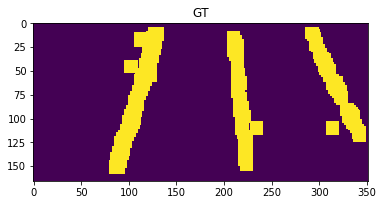

In [870]:
dilation_gt = blue_color_segment(img_gt,kernel_1 = np.ones((5,5),np.uint8),kernel_2 = np.ones((5,5),np.uint8))

# cv2.rectangle(dilation_gt,(88,55),(88+13,70),(0,0,0), cv2.FILLED)
# cv2.rectangle(dilation_gt,(280,0),(360,60),(0,0,0), cv2.FILLED)
cv2.rectangle(dilation_gt,(0,0),(70,80),(0,0,0), cv2.FILLED)
plt.imshow(dilation_gt)



plt.title("GT")

Text(0.5, 1.0, 'hough')

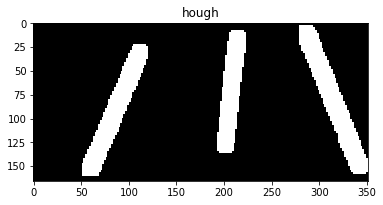

In [871]:
dilation_algo_ht = red_color_segment(img_algo_ht,kernel_1 = np.ones((1,1),np.uint8),kernel_2 = np.ones((5,5),np.uint8))

# cv2.rectangle(dilation_algo_ht,(275,1),(275+66,218),(0,0,0), cv2.FILLED)
# plt.imshow(dilation_algo_ht)


plt.title("hough")

Text(0.5, 1.0, 'sliding')

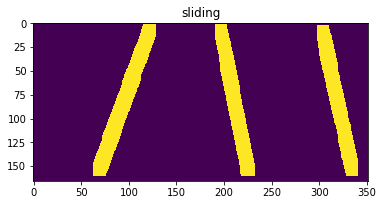

In [872]:
dilation_algo_sw = red_color_segment(img_algo_sw,kernel_1 = np.ones((1,1),np.uint8),kernel_2 = np.ones((5,5),np.uint8))

cv2.rectangle(dilation_algo_sw ,(0,0),(50,75),(0,0,0), cv2.FILLED)
plt.imshow(dilation_algo_sw)



plt.title("sliding")

Text(0.5, 1.0, 'cluster ls')

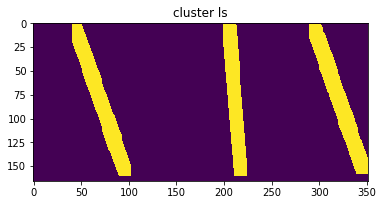

In [873]:
dilation_algo_ls = red_color_segment(img_algo_ls,kernel_1 = np.ones((1,1),np.uint8),kernel_2 = np.ones((5,5),np.uint8))

cv2.rectangle(dilation_algo_ls ,(0,0),(40,75),(0,0,0), cv2.FILLED)
plt.imshow(dilation_algo_ls)

plt.title("cluster ls")

Text(0.5, 1.0, 'cluster ransac')

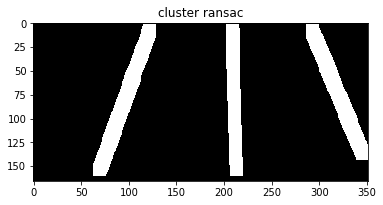

In [874]:
dilation_algo_ransac = red_color_segment(img_algo_ransac,kernel_1 = np.ones((1,1),np.uint8),kernel_2 = np.ones((5,5),np.uint8))

# cv2.rectangle(dilation_algo_ransac,(250,0),(350,240),(0,0,0), cv2.FILLED)
# plt.imshow(dilation_algo_ransac)

plt.title("cluster ransac")

Text(0.5, 1.0, 'tmgem')

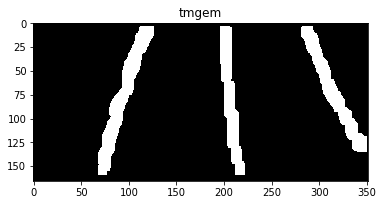

In [875]:
dilation_algo_tmgem = tmgem_color_segment(img_algo_tmgem,kernel_1 = np.ones((1,1),np.uint8),kernel_2 = np.ones((5,5),np.uint8))

# cv2.rectangle(dilation_algo_tmgem,(0,175),(50,220),(0,0,0), cv2.FILLED)
# cv2.rectangle(dilation_algo_tmgem,(10,40),(36,60),(0,0,0), cv2.FILLED)
# plt.imshow(dilation_algo_tmgem)


plt.title("tmgem")

x,y,w,h: 308 103 14 15
x,y,w,h: 204 8 38 147
x,y,w,h: 226 104 3 9
x,y,w,h: 286 4 64 121
x,y,w,h: 80 4 58 155


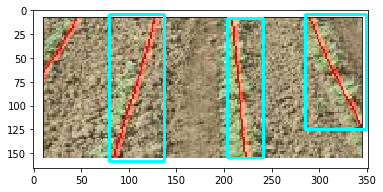

In [876]:
bb_point_gt = bb_points(img_gt, dilation_gt)


x,y,w,h: 52 22 69 139
x,y,w,h: 193 7 31 130
x,y,w,h: 279 2 73 157
IoU for box  1 is  0.4332767664301142
IoU for box  2 is  0.36668561682774337
IoU for box  3 is  0.675682750196318
Average IoU of the image (hough) = 0.492


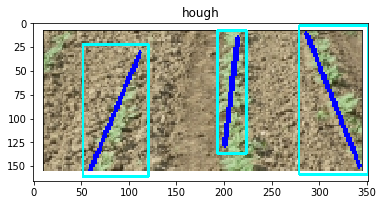

In [877]:
bb_point_algo_ht = bb_points(img_algo_ht, dilation_algo_ht)
plt.title("hough")
all_iou_ht = []
for i in range(0,len(bb_point_gt)):
    
    iou = bb_intersection_over_union(bb_point_gt[i], bb_point_algo_ht[i])
    print('IoU for box ',i+1,'is ', iou)
    all_iou_ht.append(iou)

avg_iou = Average(all_iou_ht)

print("Average IoU of the image (hough) =", round(avg_iou, 3))

x,y,w,h: 298 2 44 159
x,y,w,h: 191 1 42 160
x,y,w,h: 63 1 66 160
IoU for box  1 is  0.6352990380593894
IoU for box  2 is  0.5300261096605745
IoU for box  3 is  0.5654205607476632
Average IoU of the image (sliding window) = 0.534


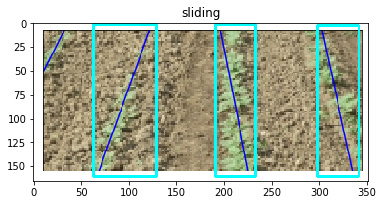

In [878]:
bb_point_algo_sw = bb_points(img_algo_sw, dilation_algo_sw)
plt.title("sliding")
all_iou_sw = []
for i in range(0,len(bb_point_gt)):
    
    iou = bb_intersection_over_union(bb_point_gt[i], bb_point_algo_sw[i])
    print('IoU for box ',i+1,'is ', iou)
    all_iou_ht.append(iou)

avg_iou = Average(all_iou_ht)

print("Average IoU of the image (sliding window) =", round(avg_iou, len(bb_point_gt)))

x,y,w,h: 290 1 62 158
x,y,w,h: 200 1 25 160
x,y,w,h: 41 1 62 160
IoU for box  1 is  0.23232323232323232
IoU for box  2 is  0.47499615325434674
IoU for box  3 is  0.7062256809338519
Average IoU of the image (least sq) = 0.471


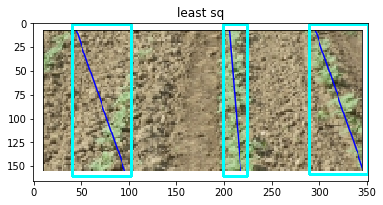

In [879]:
bb_point_algo_ls = bb_points(img_algo_ls, dilation_algo_ls)
plt.title("least sq")
all_iou_ls = []
for i in range(0,len(bb_point_gt)):
    
    iou = bb_intersection_over_union(bb_point_gt[i], bb_point_algo_ls[i])
    print('IoU for box ',i+1,'is ', iou)
    all_iou_ls.append(iou)

avg_iou = Average(all_iou_ls)

print("Average IoU of the image (least sq) =", round(avg_iou, len(bb_point_gt)))

x,y,w,h: 287 1 65 143
x,y,w,h: 203 1 18 160
x,y,w,h: 63 1 66 160
IoU for box  1 is  0.6352990380593894
IoU for box  2 is  0.4188034188034185
IoU for box  3 is  0.8095794392523362
Average IoU of the image (ransac) = 0.621


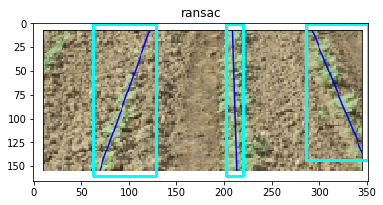

In [880]:
bb_point_algo_ransac = bb_points(img_algo_ransac, dilation_algo_ransac)
plt.title("ransac")
all_iou_ransac = []
for i in range(0,len(bb_point_gt)):
    
    iou = bb_intersection_over_union(bb_point_gt[i], bb_point_algo_ransac[i])
    print('IoU for box ',i+1,'is ', iou)
    all_iou_ransac.append(iou)

avg_iou = Average(all_iou_ransac)

print("Average IoU of the image (ransac) =", round(avg_iou, len(bb_point_gt)))

x,y,w,h: 282 3 69 133
x,y,w,h: 197 3 26 157
x,y,w,h: 68 3 59 157
IoU for box  1 is  0.6642049598832968
IoU for box  2 is  0.40625454545454537
IoU for box  3 is  0.8438487523155718
Average IoU of the image (tmgem) = 0.638


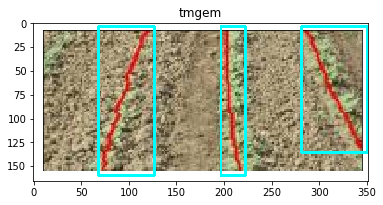

In [881]:
bb_point_algo_tmgem = bb_points(img_algo_tmgem, dilation_algo_tmgem)
plt.title("tmgem")
all_iou_tmgem = []
for i in range(0,len(bb_point_gt)):
    
    iou = bb_intersection_over_union(bb_point_gt[i], bb_point_algo_tmgem[i])
    print('IoU for box ',i+1,'is ', iou)
    all_iou_tmgem.append(iou)

avg_iou = Average(all_iou_tmgem)

print("Average IoU of the image (tmgem) =", round(avg_iou, len(bb_point_gt)))